In [109]:
# d for coin futures, f for usd s futures
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import requests as re
import pandas as pd
import numpy as np
import os
from functools import reduce

import multiprocess as mp

COIN_API = 'https://dapi.binance.com'
USD_API = 'https://fapi.binance.com'
SPOT_API = 'https://api.binance.com'
g_api_key='eJBYUpKfnUCA5wXDfJTKGPNaOoyLtnXIb9D6GKFbnABLCndVRRYJrdyI9rMi6D54'
g_secret_key='970sbCiGtH1W4rPW56I4MBbD9brKZegyveedljt3U3D5hry7zMbxa4sxacA80kUv'
headers = {"Accept": "application/json"}

def set_pandas_display_options() -> None:
    """Set pandas display options."""
    # Ref: https://stackoverflow.com/a/52432757/
    display = pd.options.display

    display.max_columns = 1000
    display.max_rows = 1000
    display.max_colwidth = 199
    display.width = 1000
    # display.precision = 2  # set as needed

set_pandas_display_options()

In [110]:
fpath = './data/spot'
files = os.listdir(fpath)
files = list(filter(lambda x: ('BULL' not in x) and ('BEAR' not in x) and ('UP' not in x) and ('DOWN' not in x), files))

In [111]:
dfs = [pd.read_csv(fpath+'/'+x).set_index('Time') for x in files]
df = reduce(lambda x,y: x.join(y, how='outer'), dfs)
returns = df.pct_change(1)
coins = returns.columns

Index(['RUNEUSDT', 'ALPHAUSDT', 'ARDRUSDT', 'NKNUSDT', 'BLZUSDT', 'MFTUSDT', 'RLCUSDT', 'REPUSDT', 'NEARUSDT', 'MBLUSDT',
       ...
       'MATICUSDT', 'DAIUSDT', 'ANTUSDT', 'BELUSDT', 'BEAMUSDT', 'RAMPUSDT', 'PAXGUSDT', 'SFPUSDT', 'BATUSDT', 'CKBUSDT'], dtype='object', length=228)

In [5]:
returns.corr().round(2)

,RUNEUSDT,ALPHAUSDT,ARDRUSDT,NKNUSDT,BLZUSDT,MFTUSDT,RLCUSDT,REPUSDT,NEARUSDT,MBLUSDT,UMAUSDT,DENTUSDT,SUSHIUSDT,AAVEUSDT,LRCUSDT,HCUSDT,DOTUSDT,DNTUSDT,EURUSDT,USDSUSDT,FIROUSDT,UTKUSDT,STPTUSDT,DOGEUSDT,ROSEUSDT,ORNUSDT,SUSDUSDT,ERDUSDT,ENJUSDT,FILUSDT,BALUSDT,MITHUSDT,CTXCUSDT,DEGOUSDT,TRBUSDT,LSKUSDT,PERPUSDT,ONTUSDT,MANAUSDT,RIFUSDT,DUSKUSDT,BCCUSDT,AVAXUSDT,OMGUSDT,OGNUSDT,STORMUSDT,RVNUSDT,CFXUSDT,DASHUSDT,PERLUSDT,BNTUSDT,LINKUSDT,KEYUSDT,DATAUSDT,DOCKUSDT,JUVUSDT,TFUELUSDT,JSTUSDT,ZRXUSDT,HNTUSDT,CVCUSDT,HOTUSDT,TRUUSDT,NANOUSDT,SOLUSDT,WANUSDT,BADGERUSDT,BTSUSDT,CELOUSDT,BUSDUSDT,DREPUSDT,WRXUSDT,GRTUSDT,ZECUSDT,XEMUSDT,MCOUSDT,WNXMUSDT,PNTUSDT,BCHUSDT,YFIIUSDT,TUSDUSDT,IOTXUSDT,GBPUSDT,VETUSDT,QTUMUSDT,BTCSTUSDT,IRISUSDT,FISUSDT,BNBUSDT,HARDUSDT,YFIUSDT,ACMUSDT,STRATUSDT,LTCUSDT,EGLDUSDT,XVSUSDT,PUNDIXUSDT,CELRUSDT,NPXSUSDT,NMRUSDT,CTSIUSDT,STMXUSDT,FTTUSDT,COMPUSDT,INJUSDT,FIOUSDT,THETAUSDT,PAXUSDT,DIAUSDT,ATOMUSDT,PSGUSDT,ANKRUSDT,SNXUSDT,LINAUSDT,RENUSDT,HIVEUSDT,ONGUSDT,ALICEUSDT,LTOUSDT,LITUSDT,USDSBUSDT,NBSUSDT,STRAXUSDT,ARPAUSDT,TCTUSDT,ZENUSDT,BANDUSDT,IOTAUSDT,FETUSDT,MTLUSDT,CRVUSDT,STXUSDT,CHZUSDT,TRXUSDT,ICXUSDT,ZILUSDT,UNIUSDT,SKLUSDT,FTMUSDT,ALGOUSDT,TKOUSDT,1INCHUSDT,NULSUSDT,TWTUSDT,OGUSDT,TROYUSDT,OCEANUSDT,AVAUSDT,REEFUSDT,KAVAUSDT,ETHUSDT,STORJUSDT,BCHSVUSDT,BTCUSDT,CHRUSDT,AUTOUSDT,OXTUSDT,MDTUSDT,AUDIOUSDT,XMRUSDT,TOMOUSDT,WTCUSDT,GTOUSDT,HBARUSDT,BCHABCUSDT,FLMUSDT,VITEUSDT,BZRXUSDT,KMDUSDT,SUNUSDT,COTIUSDT,LUNAUSDT,SXPUSDT,EOSUSDT,WAVESUSDT,XTZUSDT,DCRUSDT,FUNUSDT,CAKEUSDT,BTTUSDT,ASRUSDT,AIONUSDT,CTKUSDT,LENDUSDT,BKRWUSDT,SANDUSDT,VENUSDT,GXSUSDT,ETCUSDT,MKRUSDT,AKROUSDT,UNFIUSDT,AUDUSDT,COSUSDT,DGBUSDT,SCUSDT,ONEUSDT,OMUSDT,ADAUSDT,XZCUSDT,DODOUSDT,KSMUSDT,KNCUSDT,WINGUSDT,PONDUSDT,XRPUSDT,IOSTUSDT,WINUSDT,USDCUSDT,RSRUSDT,XLMUSDT,EPSUSDT,SRMUSDT,COCOSUSDT,AXSUSDT,ATMUSDT,VTHOUSDT,NEOUSDT,MATICUSDT,DAIUSDT,ANTUSDT,BELUSDT,BEAMUSDT,RAMPUSDT,PAXGUSDT,SFPUSDT,BATUSDT,CKBUSDT
RUNEUSDT,1.00,0.39,0.34,0.25,0.47,0.32,0.54,0.38,0.46,0.25,0.31,0.26,0.49,0.57,0.48,0.24,0.49,0.21,0.00,NaN,0.33,0.37,0.34,0.19,0.34,0.39,0.05,NaN,0.38,0.24,0.56,0.27,0.28,0.18,0.53,0.41,0.25,0.49,0.36,0.35,0.41,NaN,0.40,0.51,0.38,NaN,0.36,0.08,0.49,0.37,0.50,0.56,0.32,0.32,0.35,0.22,0.32,0.41,0.49,0.38,0.33,0.26,0.40,0.37,0.47,0.46,0.45,0.30,0.18,-0.13,0.00,0.28,0.37,0.50,0.40,0.15,0.40,0.27,0.49,0.50,-0.16,0.35,0.06,0.54,0.49,0.24,0.36,0.28,0.52,0.35,0.50,0.19,0.18,0.52,0.41,0.33,NaN,0.39,0.17,0.24,0.33,0.27,0.57,0.53,0.36,0.24,0.42,-0.15,0.44,0.51,0.19,0.37,0.55,0.43,0.52,0.30,0.27,0.17,0.43,0.37,NaN,0.17,0.33,0.40,0.34,0.38,0.54,0.50,0.44,0.24,0.50,0.33,0.29,0.44,0.49,0.48,0.47,0.37,0.41,0.51,-0.16,0.49,0.40,0.40,0.21,0.30,0.45,0.34,0.30,0.53,0.59,0.44,NaN,0.52,0.36,0.45,0.26,0.28,0.18,0.47,0.49,0.38,0.20,0.36,NaN,0.50,0.28,0.54,0.37,0.32,0.48,0.30,0.51,0.47,0.44,0.52,0.32,0.21,0.62,0.26,0.20,0.40,0.43,0.29,NaN,0.29,NaN,0.37,0.49,0.46,0.37,0.37,0.07,0.29,0.38,0.36,0.35,0.20,0.48,0.28,0.54,0.43,0.48,0.33,0.24,0.35,0.45,0.29,-0.12,0.51,0.43,0.22,0.53,-0.01,0.38,0.24,0.27,0.54,0.43,NaN,0.38,0.39,0.39,0.16,0.11,0.38,0.48,0.29
ALPHAUSDT,0.39,1.00,0.27,0.19,0.35,0.25,0.40,0.30,0.33,0.20,0.25,0.18,0.41,0.42,0.37,0.04,0.37,0.19,0.01,NaN,0.31,0.28,0.25,0.14,0.32,0.31,0.08,NaN,0.29,0.18,0.42,0.19,0.20,0.18,0.38,0.32,0.26,0.40,0.29,0.31,0.30,NaN,0.33,0.38,0.28,NaN,0.26,0.12,0.37,0.27,0.37,0.43,0.24,0.26,0.26,0.18,0.23,0.32,0.36,0.32,0.26,0.22,0.35,0.31,0.33,0.35,0.44,0.23,0.14,-0.09,-0.00,0.21,0.33,0.37,0.37,-0.00,0.28,0.19,0.38,0.36,-0.13,0.27,0.02,0.41,0.38,0.18,0.27,0.29,0.37,0.27,0.36,0.14,0.05,0.39,0.29,0.27,NaN,0.28,0.13,0.17,0.25,0.21,0.43,0.41,0.31,0.16,0.32,-0.11,0.35,0.38,0.16,0.29,0.40,0.44,0.38,0.24,0.24,0.17,0.31,0.39,NaN,0.12,0.30,0.30,0.22,0.30,0.38,0.40,0.33,0.19,0.36,0.21,0.23,0.36,0.38,0.35,0.41,0.35,0.32,0.40,-0.26,0.48,0.28,0.36,0.20,0.22,0.36,0.29,0.26,0.37,0.47,0.33,NaN,0.38,0.28,0.45,0.23,0.20,0.15,0.34,0.37,0.28,0.15,0.28,NaN,0.40,0.21,0.40,0.27,0.23,0.35,0.25,0.38,0.37,0.35,0.41,0.25,0.16,0.58,0.21,0.17,0.

In [6]:
def top_correlation(corr_matrix, n):
    corr_matrix = corr_matrix.fillna(-2)
    coins = corr_matrix.columns
    corr = []
    for i in range(len(coins)):
        coin1 = coins[i]
        for j in range(i+1,len(coins)):
            coin2 = coins[j]
            if corr_matrix.loc[coin1, coin2] == -2:
                continue
            corr.append((coin1+'/'+coin2, float(corr_matrix.loc[coin1, coin2])))
    corr.sort(key=lambda tup: tup[1])
    # top
    top = pd.DataFrame({'coin':[x[0] for x in corr[-n:]], 'corr':[x[1] for x in corr[-n:]]})
    bot = pd.DataFrame({'coin':[x[0] for x in corr[:n]], 'corr':[x[1] for x in corr[:n]]})
    return corr, top, bot
corr, top, bot = top_correlation(returns.corr(), 10)
top, bot
# outright correlations
# bnb + cake highly positively correlated, but is that just they were trending?

(               coin      corr
 0   LTCUSDT/EOSUSDT  0.761989
 1   BCHUSDT/ETHUSDT  0.766766
 2   BCHUSDT/EOSUSDT  0.767779
 3  TKOUSDT/PAXGUSDT  0.774662
 4   LTCUSDT/BTCUSDT  0.778857
 5   BCHUSDT/LTCUSDT  0.803033
 6   LTCUSDT/ETHUSDT  0.805178
 7   JUVUSDT/PSGUSDT  0.811194
 8   ETHUSDT/BTCUSDT  0.821570
 9  BNBUSDT/CAKEUSDT  0.884010,
                 coin      corr
 0    NKNUSDT/TKOUSDT -0.616159
 1    ACMUSDT/TKOUSDT -0.614851
 2  TKOUSDT/1INCHUSDT -0.598092
 3    OGNUSDT/TKOUSDT -0.560801
 4    BLZUSDT/TKOUSDT -0.528291
 5    TKOUSDT/ATMUSDT -0.521766
 6    PSGUSDT/TKOUSDT -0.491650
 7    TKOUSDT/AUDUSDT -0.488531
 8   SUSDUSDT/TKOUSDT -0.460240
 9    JUVUSDT/TKOUSDT -0.446143)

In [7]:
from statsmodels.regression.rolling import RollingOLS
import statsmodels.api as sm
coiny = 'ETHUSDT'
btc = 'BTCUSDT'
regData = returns[[coiny, btc]].dropna()
y = regData[[coiny]]
x = regData[[btc]]
x = sm.add_constant(x)
n = 14
model = RollingOLS(y,x,window=24*30)
results = model.fit()
param_df = results.params
param_df.index = pd.to_datetime(param_df.index)

<AxesSubplot:title={'center':'ETHUSDT beta to BTCUSDT rolling 14-day window'}, xlabel='Time'>

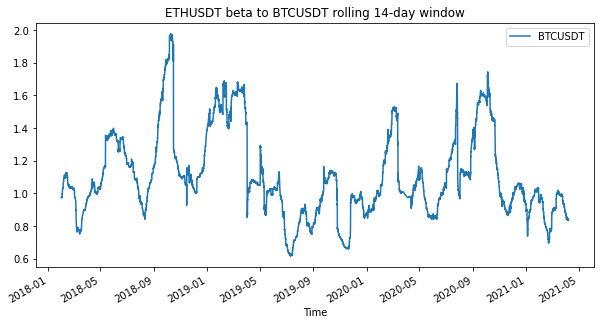

In [8]:
param_df.plot(y=btc, figsize=(10,5), title=coiny + ' beta to ' + btc + ' rolling '+str(n)+'-day window')

In [9]:
from statsmodels.regression.rolling import RollingOLS
import statsmodels.api as sm
coiny = 'ETHUSDT'
btc = 'BTCUSDT'
returns1 = df.iloc[::24,:].pct_change(1)
regData = returns1[[coiny, btc]].dropna()
y = regData[[coiny]]
x = regData[[btc]]
x = sm.add_constant(x)
n = 14
model = RollingOLS(y,x,window=14)
results = model.fit()
param_df = results.params
param_df.index = pd.to_datetime(param_df.index)

<AxesSubplot:title={'center':'ETHUSDT beta to BTCUSDT rolling 14-day window'}, xlabel='Time'>

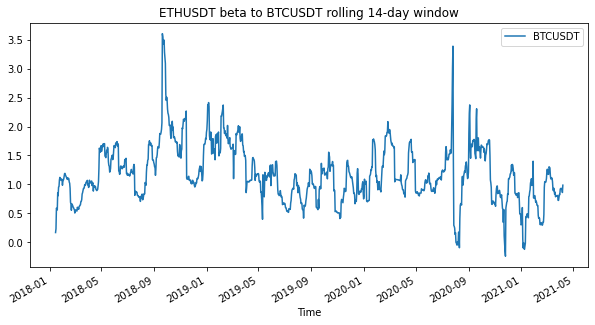

In [10]:
param_df.plot(y=btc, figsize=(10,5), title=coiny + ' beta to ' + btc + ' rolling '+str(n)+'-day window')

In [11]:
beta_df = {'Coin':[],'Beta':[],'R2':[],'Tstat':[]}
n = 90
for coin in coins:
    if coin == btc:
        continue
    regData = returns[[coin, btc]].dropna().tail(24*n)
    if regData.empty:
        continue
    y = regData[[coin]]
    x = regData[[btc]]
    x = sm.add_constant(x)
    model = sm.OLS(y,x)
    results = model.fit() 
    beta = results.params[btc]
    r2 = results.rsquared_adj
    tstat = results.tvalues[btc]
    beta_df['Coin'].append(coin)
    beta_df['Beta'].append(beta)
    beta_df['R2'].append(r2)
    beta_df['Tstat'].append(tstat)
beta_df = pd.DataFrame(beta_df)
beta_df_filt = beta_df.loc[beta_df['R2'] > 0.05].dropna()
beta_df_filt = beta_df_filt.sort_values(by='R2',ascending=False)

/usr/local/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:17

In [13]:
#beta_df_filt
import statsmodels as stm

<ipython-input-14-defa36fa1069>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['spread'] = data[coiny] - beta * data[coinx]


(-2.9861298089078394,
 0.036210161408958524,
 15,
 2144,
 {'1%': -3.433403706423204,
  '5%': -2.8628890128376687,
  '10%': -2.567488148399212},
 17441.09125345825)

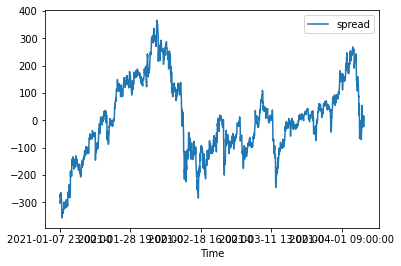

In [14]:
coiny = 'ETHUSDT'
coinx = 'LTCUSDT'
regData = df[[coiny, coinx]].dropna()
y = regData[[coiny]]
x = regData[[coinx]]
n = 90
model = RollingOLS(y,x,window=n*24)
results = model.fit()
param_df = results.params
param_df.index = pd.to_datetime(param_df.index)
beta = param_df.tail(1)[coinx].values[0]
data = regData.tail(n*24)
data['spread'] = data[coiny] - beta * data[coinx]
data.plot(y='spread')
stm.tsa.stattools.adfuller(list(data['spread']))

In [95]:
files = os.listdir('./results/pairs')
files_df = [pd.read_csv('./results/pairs/'+x) for x in files]
files_df = list(filter(lambda x: not x.empty, files_df))
files_tot = reduce(lambda x,y: x.append(y), files_df)

In [104]:
d = files_tot.sort_values(by='ADFPValue').round(2)
d.loc[d['ADFPValue'] < 0.03]

,Unnamed: 0,Coin1,Coin2,Beta,R2,Tstat,ADF,ADFPValue,Lags,Results
0,0,USDSUSDT,USDSBUSDT,1.00,1.00,21129.92,-15.53,0.00,2,<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x139197130>
0,0,TKOUSDT,OGUSDT,0.26,0.98,23.93,-15.41,0.00,4,<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1391ce130>
0,0,TUSDUSDT,USDCUSDT,1.00,1.00,233689.19,-14.35,0.00,5,<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1391bca30>
0,0,BUSDUSDT,USDCUSDT,1.00,1.00,296245.78,-12.07,0.00,6,<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1391ac4c0>
0,0,USDSBUSDT,USDCUSDT,1.00,1.00,20300.84,-11.46,0.00,4,<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1391c9d60>
...,...,...,...,...,...,...,...,...,...,...
0,0,MFTUSDT,OGUSDT,0.00,0.93,173.51,-3.12,0.02,22,<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x139198520>
0,0,PERPUSDT,SKLUSDT,11.45,0.99,197.47,-3.12,0.02,0,<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1391bc760>
0,0,ARDRUSDT,CTSIUSDT,0.80,0.95,209.96,-3.12,0.02,25,<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1391cc0a0>
0,0,STRATUSDT,KSMUSDT,0.01,0.99,345.53,-3.12,0.02,2,<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x139198e50>


<ipython-input-120-51e38d69c7fb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['spread'] = data[coiny] - beta * data[coinx]


<AxesSubplot:xlabel='Time'>

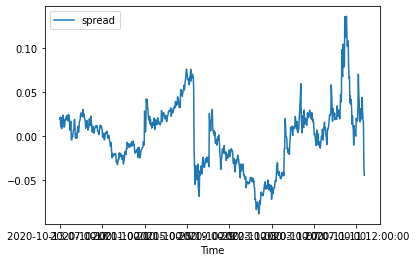

In [120]:
coiny = 'STRATUSDT'
coinx = 'KSMUSDT'
regData = df[[coiny, coinx]].dropna()
y = regData[[coiny]]
x = regData[[coinx]]
n = 30
model = RollingOLS(y,x,window=n*24)
results = model.fit()
param_df = results.params
param_df.index = pd.to_datetime(param_df.index)
beta = param_df.tail(1)[coinx].values[0]
data = regData.tail(n*24)
data['spread'] = data[coiny] - beta * data[coinx]
data.plot(y='spread')

In [119]:
df[coinx].dropna()

Time
2020-09-04 11:00:00     42.103
2020-09-04 12:00:00     40.733
2020-09-04 13:00:00     40.830
2020-09-04 14:00:00     37.450
2020-09-04 15:00:00     38.980
                        ...   
2021-04-07 20:00:00    429.796
2021-04-07 21:00:00    430.822
2021-04-07 22:00:00    436.757
2021-04-07 23:00:00    427.229
2021-04-08 00:00:00    437.732
Name: KSMUSDT, Length: 5166, dtype: float64